In [1]:
#### download prediction model for lab of origin
#### other models can also be found in the prediction_models folder

!wget https://huggingface.co/lingxusb/PlasmidGPT/resolve/main/embedding_prediction_labs.pth
!wget https://huggingface.co/lingxusb/PlasmidGPT/resolve/main/lab_list.txt

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


d:\daxue\downloads\Anaconda3\envs\PlasmidGPT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model loaded successfully.
Default is Addgene plasmid 202306 (https://www.addgene.org/202306/)
Using CPU.
Finished calculation of embeddings



C:\Users\xuwt\AppData\Local\Temp\ipykernel_16040\2184396910.py:73: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X_data = torch.tensor([embedding[0]], dtype=torch.float32).to(device)


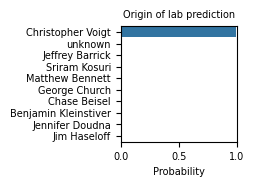

In [1]:
import torch
import numpy as np
from transformers import PreTrainedTokenizerFast
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn

# Define the input sequence, Addgene plasmid 202306
sequence = ('GAATCTCGCGTAGACACATACATGAGCAGCGAAAAGAGGTGGCCAGGGGGATCACCTGGCAGCATGCTGCCTAATAAAAAAGGCCGGAAAATCCGGCCTTTTGACGCTTTAGCTCTGACGGCTCAGTGCTGCCCACAGGCTTTCTTCAACACCGGTCAGCAGTTCATCGGTCAGGCTCAGATAATCGTTCTCGATCATTTCATACACTTCCATAAAGCTGCCAAACAGAATTGCAATCAGTGCATTTTCCGGCAGATTACGAATCACACCCTGTTTCTGACCTTCACGAAAAAAGGTGCACACAAATTCAACCAGTTTCTGATATGCCAGACGGCTTTCTTCGGTCAGAAAGGTGCCCTGGCTATGGGTTTTGATAAAACCCAGTGCACGCGGATGATTTTTGGTAAAGGTCACCATACCTTCAAAAATGTGATGAAAGCCATCACGATAACCATCACGTTCATTTGCCAGACCGCTTTCAATACACTGCAGAAATTCATTAACATGCTGCTGAAACAGTTCGTTCACCAGGCTTTCTTTGTTTTTGAAATAGCGATAAATGGTGCCTGCACCAACTTTTGCATTTTCTGCAATCATCGGCATGGTGGTTGCATCAAAACCACGTTCTGCAAACAGCAGCAGGCTTGCGCTAAAAATTGCTTTCTGTTTGGTCGGGGTGCTTTCCATCCTCCCGGCCTCGTTTGGTTAAACAAAATTATTTGTAGAGGACTGTTTCGGCCCTTTTGGGCCATCGTCAGGTCGGATACACATCCGGCGACAGTCTAATTGTGAGCGCTCACAATTCCACACATTATACGAGCCGATGATTAATTGTCAACACAGCCAACGATCGTTCTCCCAGTACAATCTGCTCTGATGCCCTCGAGTGCGGCCGCACTAGTGTCGACGGAGCTCGAATTCGGATCCGAAGTTCCTATACTTTCTAGAGAATAGGAACTTCGGAATAGGAACTTCTATTTTTATAGGTTAATGTCATGATAATAATGGTTTCTTAGACCATGCCTATTTGTTTATTTTTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGCCATATTCAACGGGAAACGTCTTGCTCTAGGCCGCGATTAAATTCCAACATGGATGCTGATTTATATGGGTATAAATGGGCTCGCGATAATGTCGGGCAATCAGGTGCGACAATCTATCGATTGTATGGGAAGCCCGATGCGCCAGAGTTGTTTCTGAAACATGGCAAAGGTAGCGTTGCCAATGATGTTACAGATGAGATGGTCAGACTAAACTGGCTGACGGAATTTATGCCTCTTCCGACCATCAAGCATTTTATCCGTACTCCTGATGATGCATGGTTACTCACCACTGCGATCCCCGGGAAAACAGCATTCCAGGTATTAGAAGAATATCCTGATTCAGGTGAAAATATTGTTGATGCGCTGGCAGTGTTCCTGCGCCGGTTGCATTCGATTCCTGTTTGTAATTGTCCTTTTAACAGCGACCGCGTATTTCGTCTCGCTCAGGCGCAATCACGAATGAATAACGGTTTGGTTGATGCGAGTGATTTTGATGACGAGCGTAATGGCTGGCCTGTTGAACAAGTCTGGAAAGAAATGCATAAACTTTTGCCATTCTCACCGGATTCAGTCGTCACTCATGGTGATTTCTCACTTGATAACCTTATTTTTGACGAGGGGAAATTAATAGGTTGTATTGATGTTGGACGAGTCGGAATCGCAGACCGATACCAGGATCTTGCCATCCTATGGAACTGCCTCGGTGAGTTTTCTCCTTCATTACAGAAACGGCTTTTTCAAAAATATGGTATTGATAATCCTGATATGAATAAATTGCAGTTTCATTTGATGCTCGATGAGTTTTTCTAAAGCTCGCTTGGACTCCTGTTGATAGATCCAGTAATGACCTCAGAACTCCATCTGGATTTGTTCAGAACGCTCGGTTGCCGCCGGGCGTTTTTTATTGGTGAGAATCCAAGCTTAAGGTATACTTTCCGCTGCATAACCCTGCTTCGGGGTCATTATAGCGATTTTTTCGGTATATCCATCCTTTTTCGCACGATATACAGGATTTTGCCAAAGGGTTCGTGTAGACTTTCCTTGGTGTATCCAACGGCGTCAGCCGGGCAGGATAGGTGAAGTAGGCCCACCCGCGAGCGGGTGTTCCTTCTTCACTGTCCCTTATTCGCACCTGGCGGTGCTCAACGGGAATCCTGCTCTGCGAGGCTGGCCGATAAGCTACAAGAAGATCCGGCCACGATGCGTCCGGCGTAGAGGATCTGAAGATCAGCAGTTCAACCTGTTGATAGTACGTACTAAGCTCTCATGTTTCACGTACTAAGCTCTCATGTTTAACGTACTAAGCTCTCATGTTTAACGAACTAAACCCTCATGGCTAACGTACTAAGCTCTCATGGCTAACGTACTAAGCTCTCATGTTTCACGTACTAAGCTCTCATGTTTGAACAATAAAATTAATATAAATCAGCAACTTAAATAGCCTCTAAGGTTTTAAGTTTTATAAGAAAAAAAAGAATATATAAGGCTTTTAAAGCTTTTAAGGTTTAACGGTTGTGGACAACAAGCCAGGGATGTAACGCACTGAGAAGCCCTTAGAGCCTCTCAAAGCAATTTTGAGTGACACAGGAACACTTAACGGCTGACATGGGAATTAGCCATGGGCCCGTGCGAATCATTTTTACGGTTCCTGGCCTTTTGCTGGCCTTTTGCTCACATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCTAGCCAAGAGCAGTGCCTTGCAGAAGTTCTCGGGCGA')

# Load the pre-trained model and tokenizer
pt_file_path = '../pretrained_model/pretrained_model.pt'
model = torch.load(pt_file_path)
model.eval()
print("Model loaded successfully.")

tokenizer = PreTrainedTokenizerFast(tokenizer_file='../pretrained_model/addgene_trained_dna_tokenizer.json')

# Add special tokens
special_tokens_dict = {'additional_special_tokens': ['[PROMPT]', '[PROMPT2]']}
tokenizer.add_special_tokens(special_tokens_dict)

# Tokenize the input sequence
print("Default is Addgene plasmid 202306 (https://www.addgene.org/202306/)")
tokenized_sequences = [[3]*10 + [2] + tokenizer.encode(sequence)]

# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Using device: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "Using CPU.")

# Get embeddings from the model
embedding = []
for tokenized_seq in tokenized_sequences:
    input_ids = torch.tensor([tokenized_seq], dtype=torch.long).to(device)
    model.config.output_hidden_states = True

    # Inference to obtain hidden states
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs.hidden_states[-1].cpu().numpy()
        hidden_states_mean = np.mean(hidden_states, axis=1).reshape(-1)
        embedding.append(hidden_states_mean)

embedding = np.array(embedding)
print("Finished calculation of embeddings\n")

# Load the neural network for prediction
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# number of unique lab labels is 948
num_classes = 948
input_dim = 768
model_path = "../prediction_models/embedding_prediction_labs.pth"
list_file_name = '../prediction_models/lab_list.txt'

model_NN = SimpleNN(input_dim, num_classes).to(device)
model_NN.load_state_dict(torch.load(model_path, map_location=device))
model_NN.eval()

# Perform inference
X_data = torch.tensor([embedding[0]], dtype=torch.float32).to(device)
output = model_NN(X_data)

# Calculate probabilities using softmax
probs = torch.nn.functional.softmax(output, dim=1).detach().cpu().numpy()[0]

# Load labels
lab_list = []
with open(list_file_name, 'r') as file:
    lab_list = [line.strip() for line in file]

lab_list = np.array(lab_list)

# Get top 10 predictions
prob_idx = np.argsort(probs)[::-1][:10]
top_probs = probs[prob_idx]
top_labels = lab_list[prob_idx]

# Plot the top 10 predicted labels
plt.figure(figsize=(1.5, 1.5))
sns.barplot(x=top_probs, y=top_labels, orient='h')
plt.xlabel('Probability', fontsize = 7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Origin of lab prediction", fontsize = 7)

plt.xlim([0, 1])
plt.show()